<h1>Hierarchical clustering</h1>

O Hierarchical Clustering (Agrupamento Hierárquico) é um método de aprendizado não supervisionado que constrói uma árvore de agrupamento (chamada dendrograma), onde os clusters são formados de maneira recursiva com base na similaridade entre os dados.

<h3>🎯 O que é e qual o objetivo?</h3>
O objetivo é agrupar dados similares em uma estrutura hierárquica, que permite visualizar diferentes níveis de agrupamento, desde cada ponto isolado até todos em um único grupo.

Existem dois tipos principais:
<ul>
    <li>Aglomerativo (bottom-up) – o mais comum:
        <ul>
            <li>Começa com cada ponto em um cluster individual.</li>
            <li>Vai juntando os clusters mais próximos até formar um único grupo.</li>
        </ul>
    </li>
    <li>Divisivo (top-down):
        <ul>
            <li>Começa com todos os pontos em um único cluster.</li>
            <li>Vai dividindo em clusters menores.</li>
        </ul>
    </li>
</ul>

<h3>✅ Pré-requisitos</h3>
<ol>
    <li>Matriz de distâncias ou métrica de similaridade.</li>
    <li>Dados numéricos ou com uma medida de distância definida (ex: Euclidiana).</li>
    <li>Não precisa definir o número de clusters, mas pode-se cortar o dendrograma para escolher um número apropriado.</li>
</ol>

<h3>✅ Vantagens</h3>
<ul>
    <li>Não requer definir k inicialmente.</li>
    <li>Gera dendrogramas interpretáveis.</li>
    <li>Permite análise visual de diferentes níveis de agrupamento.</li>
</ul>

<h3>❌ Desvantagens</h3>
<ul>
    <li>Custo computacional alto: O(n²), inviável para datasets muito grandes.</li>
    <li>Sensível a outliers e ruído.</li>
    <li>Após mesclar clusters, não reverte decisões.</li>
</ul>

<h3>💼 Aplicações comuns</h3>
<ul>
    <li>📊 Análise exploratória de dados
        <ul>
            <li>Identificar padrões e agrupamentos naturais.</li>
            <li>Análise de comportamento de consumidores.</li>
        </ul>
    </li>
    <li>🧬 Bioinformática
        <ul>
            <li>Agrupamento de genes ou amostras genéticas com base em similaridade.</li>
        </ul>
    </li>
    <li>📚 NLP
        <ul>
            <li>Agrupamento de documentos ou palavras com base em vetores de similaridade</li>
        </ul>
    </li>
    <li>🧠 Psicologia e Ciências Sociais
        <ul>
            <li>Análise de perfis de participantes em estudos experimentais.</li>
        </ul>
    </li>
</ul>










.












<h2>Iniciando o ambiente</h2>

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist 


<h2>Importando os dados a serem analisados</h2>

In [13]:
cars = pd.read_csv('mtcars.csv')
cars.rename(columns={'Unnamed: 0':'car_name'}, inplace=True)
cars.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:
X = cars[['mpg','disp','hp','wt']].values
X

array([[ 21.   , 160.   , 110.   ,   2.62 ],
       [ 21.   , 160.   , 110.   ,   2.875],
       [ 22.8  , 108.   ,  93.   ,   2.32 ],
       [ 21.4  , 258.   , 110.   ,   3.215],
       [ 18.7  , 360.   , 175.   ,   3.44 ],
       [ 18.1  , 225.   , 105.   ,   3.46 ],
       [ 14.3  , 360.   , 245.   ,   3.57 ],
       [ 24.4  , 146.7  ,  62.   ,   3.19 ],
       [ 22.8  , 140.8  ,  95.   ,   3.15 ],
       [ 19.2  , 167.6  , 123.   ,   3.44 ],
       [ 17.8  , 167.6  , 123.   ,   3.44 ],
       [ 16.4  , 275.8  , 180.   ,   4.07 ],
       [ 17.3  , 275.8  , 180.   ,   3.73 ],
       [ 15.2  , 275.8  , 180.   ,   3.78 ],
       [ 10.4  , 472.   , 205.   ,   5.25 ],
       [ 10.4  , 460.   , 215.   ,   5.424],
       [ 14.7  , 440.   , 230.   ,   5.345],
       [ 32.4  ,  78.7  ,  66.   ,   2.2  ],
       [ 30.4  ,  75.7  ,  52.   ,   1.615],
       [ 33.9  ,  71.1  ,  65.   ,   1.835],
       [ 21.5  , 120.1  ,  97.   ,   2.465],
       [ 15.5  , 318.   , 150.   ,   3.52 ],
       [ 1

In [21]:
y=cars['am'].values
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

<h2>Usando o Scipy para gerar um dendrograma</h2>

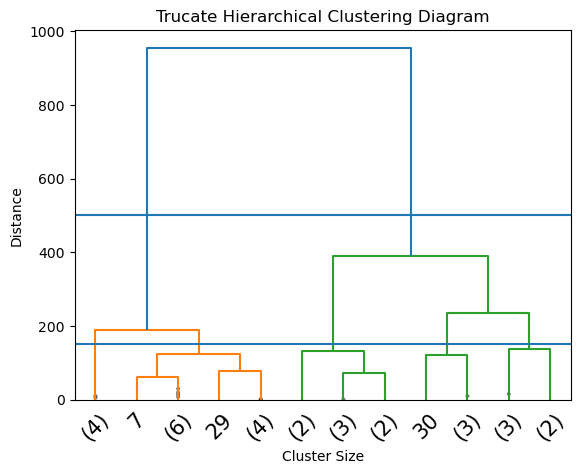

In [33]:

Z=linkage(X,'ward')
dendrogram(Z, p=12, truncate_mode='lastp', leaf_font_size=15, leaf_rotation=45, show_contracted=True)
plt.title('Trucate Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(500)
plt.axhline(150)

plt.show()


<h2>Gerando o Hierarchical Cluster</h2>

<h4>euclidean/ward</h4>

In [53]:
k=2

h_clustering = AgglomerativeClustering(n_clusters=k,  metric='euclidean', linkage='ward')
h_clustering.fit(X)

sm.accuracy_score(y, h_clustering.labels_)


0.78125

<h3>Demais métricas e linkages</h3>
<ul><li>metric : str or callable, default="euclidean"</li>
    <ul><li>Metric used to compute the linkage. Can be "euclidean", "l1", "l2",<br>
    "manhattan", "cosine", or "precomputed". If linkage is "ward", only<br>
    "euclidean" is accepted. If "precomputed", a distance matrix is needed<br>
    as input for the fit method.</li></ul>
</ul>
<ul><li>linkage : {'ward', 'complete', 'average', 'single'}, default='ward'</li>
    <ul><li>Which linkage criterion to use. The linkage criterion determines which<br>
    distance to use between sets of observation. The algorithm will merge<br>
    the pairs of cluster that minimize this criterion. </li></ul>
</ul>

<h4>euclidean/average</h4>

In [55]:
k=2

h_clustering = AgglomerativeClustering(n_clusters=k,  metric='euclidean', linkage='average')
h_clustering.fit(X)

sm.accuracy_score(y, h_clustering.labels_)

0.78125

<h4>manhattan/average</h4>

In [57]:

h_clustering = AgglomerativeClustering(n_clusters=k,  metric='manhattan', linkage='average')
h_clustering.fit(X)

sm.accuracy_score(y, h_clustering.labels_)

0.71875

<h4>cosine/average</h4>

In [59]:

h_clustering = AgglomerativeClustering(n_clusters=k,  metric='cosine', linkage='average')
h_clustering.fit(X)

sm.accuracy_score(y, h_clustering.labels_)

0.1875

<h4>L1/average</h4>

In [61]:

h_clustering = AgglomerativeClustering(n_clusters=k,  metric='l1', linkage='average')
h_clustering.fit(X)

sm.accuracy_score(y, h_clustering.labels_)

0.71875

<h4>L2/average</h4>

In [63]:

h_clustering = AgglomerativeClustering(n_clusters=k,  metric='l2', linkage='average')
h_clustering.fit(X)

sm.accuracy_score(y, h_clustering.labels_)

0.78125